In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from uncertainties import ufloat

In [2]:
data = pd.read_csv('esp4.csv')
data

,Frequenza,Vout,Vin,ritardo,periodo,err vin,err vout,err t,fase mis,fase,atten
0,100,0.1520,10.10,2.460000e-03,0.010000,NaN,NaN,1.000000e-07,1.545664,88.5600,0.015050
1,500,0.7400,10.10,4.640000e-04,0.002000,NaN,NaN,1.000000e-07,1.457699,83.5200,0.073267
2,1000,1.5200,10.00,2.160000e-04,0.001000,NaN,NaN,1.000000e-07,1.357168,77.7600,0.152000
3,1500,2.4600,9.60,1.280000e-04,0.000667,NaN,NaN,1.000000e-07,1.206372,69.1200,0.256250
4,1700,2.9200,9.36,1.060000e-04,0.000588,NaN,NaN,1.000000e-07,1.132230,64.8720,0.311966
5,1900,3.3200,9.28,8.800000e-05,0.000526,NaN,NaN,1.000000e-07,1.050549,60.1920,0.357759
6,2100,3.7200,8.88,7.280000e-05,0.000476,NaN,NaN,1.000000e-07,0.960573,55.0368,0.418919
7,2300,4.2400,8.56,5.760000e-05,0.000435,NaN,NaN,1.000000e-07,0.832396,47.6928,0.495327
8,2500,4.6400,8.24,4.480000e-05,0.000400,NaN,NaN,1.000000e-07,0.703717,40.3200,0.563107
9,2700,5.0400,7.92,3.200000e-05,0.000370,NaN,NaN,1.000000e-07,0.542867,31.1040,0.636364


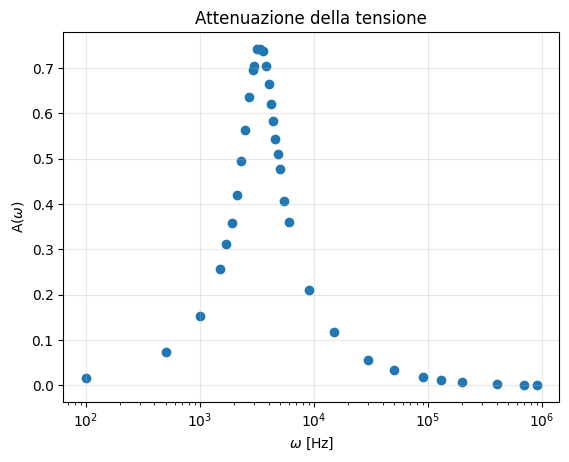

In [43]:
plt.xscale('log')
plt.grid(alpha=0.3)
plt.title("Attenuazione della tensione")
plt.xlabel(r"$\omega$ [Hz]")
plt.ylabel(r"A($\omega$)")
plt.scatter(data["Frequenza"], data["atten"])
plt.savefig("attenuazione.png")

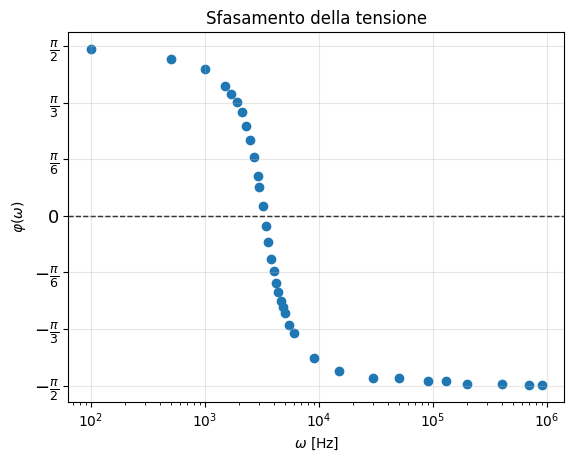

In [40]:
plt.title("Sfasamento della tensione")
plt.xscale('log')
plt.grid(alpha=0.3)
ticks = np.linspace(-90, 90, 7)
tickss = [2, 3, 6]
plt.yticks(ticks, [r"$-\frac{{\pi}}{{{}}}$".format(val) for val in tickss]+[0]+[r"$\frac{{\pi}}{{{}}}$".format(val) for val in tickss[::-1]], fontsize=13)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, zorder=0)
plt.xlabel(r"$\omega$ [Hz]")
plt.ylabel(r"$\varphi$($\omega$)")
plt.scatter(data["Frequenza"], data["fase"])
plt.savefig("fase.png")

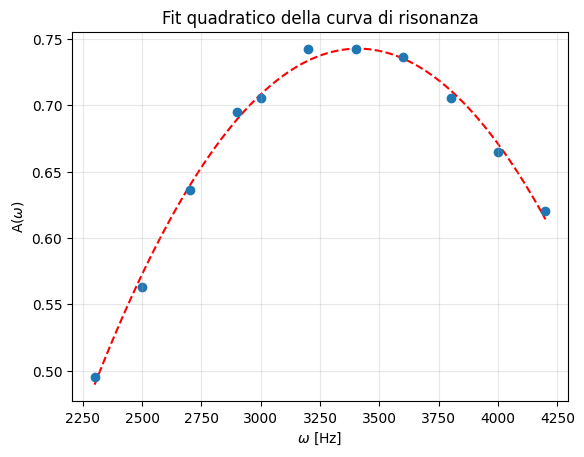

In [80]:
fit1_data = data.iloc[7:18]
fit1, cov1 = np.polyfit(fit1_data["Frequenza"], fit1_data["atten"], 2, cov=True)
c1, b1, a1 = fit1
var_c1 = cov1[0,0]
var_b1 = cov1[1,1]
var_a1 = cov1[2,2]
cov_ab1 = cov1[2,1]
cov_ac1 = cov1[2,0]
cov_bc1 = cov1[1,0]
plt.title("Fit quadratico della curva di risonanza")
plt.grid(alpha=0.3)
plt.scatter(fit1_data["Frequenza"], fit1_data["atten"], zorder=1)
lin = np.linspace(fit1_data["Frequenza"].min(), fit1_data["Frequenza"].max(), 100)
plt.plot(lin, a1+b1*lin+c1*lin**2, c="red", zorder=0, linestyle="--")
plt.xlabel(r"$\omega$ [Hz]")
plt.ylabel(r"A($\omega$)")
plt.savefig("fit_quadratico.png")

In [99]:
err_am = var_a1+((b1**2)/(4*(c1**2)))*var_b1+(b1**4/(16*(c1**4)))*var_c1-(b1/c1)*cov_ab1 + (b1**2/(2*(c1**2)))*cov_ac1-(b1**3/(4*(c1**3)))*cov_bc1
am = ufloat((4*a1*c1 - b1**2)/(4*c1), sqrt(err_am))
err_omega_0 = (b1**2/(4*(c1**4)))*var_c1+(1/(4*(c1**2)))*var_b1-(b1/2*(c1**3))
omega_0 = ufloat(-b1/(2*c1),sqrt(err_omega_0))
err_q1 = (1/(b1**2-4*a1*c1)**3)*(2*(b1**2)*(a1**2)*var_c1+8*(a1**2)*(c1**2)*var_b1+2*(b1**2)*(c1**2)*var_a1+4*c1*(b1**2)*a1*cov_ac1-8*c1*b1*(a1**2)*cov_bc1-8*(c1**2)*b1*a1*cov_ab1)
q1 = ufloat(b1/sqrt(2*(b1**2 - 4*a1*c1)), sqrt(err_q1))
print("L'attenuazione massima è: ", am)
print("La frequenza di risonanza è: ", omega_0)
print("Il fattore di merito è: ", q1)

L'attenuazione massima è:  0.7425+/-0.0029
La frequenza di risonanza è:  (3.41+/-0.14)e+03
Il fattore di merito è:  1.268+/-0.016


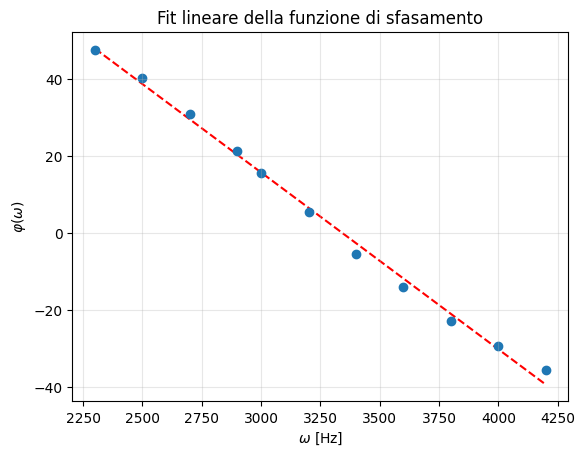

In [101]:
fit2_data = data.iloc[7:18]
fit2, cov2 = np.polyfit(fit2_data["Frequenza"], fit2_data["fase"], 1, cov=True)
b2, a2 = fit2
var_b2 = cov2[1,1]
var_a2 = cov2[0,0]
cov_2 = cov2[1,0]
plt.title("Fit lineare della funzione di sfasamento")
plt.grid(alpha=0.3)
plt.scatter(fit2_data["Frequenza"], fit2_data["fase"], zorder=1)
lin2 = np.linspace(fit2_data["Frequenza"].min(), fit2_data["Frequenza"].max(), 100)
plt.plot(lin, a2+b2*lin2, c="red", zorder=0, linestyle="--")
plt.xlabel(r"$\omega$ [Hz]")
plt.ylabel(r"$\varphi$($\omega$)")
plt.savefig("fit_lineare.png")

In [103]:
err_omega0 = (1/(a2**2))*var_b2 + ((b2**2)/(a2**4))*var_a2 - 2*(1/a2)*((b2**2)/(a2**2))*cov_2
omega0 = ufloat(-a2/b2, sqrt(err_omega0))
err_q2 = err_omega0*np.pi/(4*180)
q2 = ufloat((a2*np.pi)/(2*180), sqrt(err_q2))
print("La frequenza di risonanza è: ", omega0)
print("Il fattore di merito è: ", q2)


La frequenza di risonanza è:  3343.223+/-0.022
Il fattore di merito è:  1.3421+/-0.0015
